In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

In [4]:
df = pd.read_csv('/home/kellyj/Programing/PythonProjects/temp/Ames_Housing_Data_NoOutLiers.csv')
df

,Unnamed: 0,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2923,2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2924,2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2925,2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [5]:
df = df.drop('PID',axis=1)

In [8]:
df.isnull().sum()

Unnamed: 0          0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

In [12]:
def percentMissing(df):
    perMissing = 100*df.isnull().sum() / len(df)
    perMissing = perMissing[perMissing > 0].sort_values(ascending=False)
    return perMissing


In [13]:
missing = percentMissing(df)

In [18]:
missing[missing<1]

Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
Garage Cars       0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
BsmtFin SF 1      0.034165
Electrical        0.034165
dtype: float64

In [20]:
df[df['Electrical'].isnull()]['Garage Area']

1576    400.0
Name: Garage Area, dtype: float64

In [24]:
df[df['Bsmt Half Bath'].isnull()]#['Garage Area']

,Unnamed: 0,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [28]:
df = df.dropna(axis=0,subset=['Electrical','Garage Cars'])

In [29]:
missing = percentMissing(df)

In [30]:
missing

Pool QC           99.589744
Misc Feature      96.410256
Alley             93.230769
Fence             80.478632
Fireplace Qu      48.547009
Lot Frontage      16.752137
Garage Cond        5.401709
Garage Qual        5.401709
Garage Finish      5.401709
Garage Yr Blt      5.401709
Garage Type        5.367521
Bsmt Exposure      2.837607
BsmtFin Type 2     2.769231
BsmtFin Type 1     2.735043
Bsmt Qual          2.735043
Bsmt Cond          2.735043
Mas Vnr Area       0.786325
Mas Vnr Type       0.786325
Bsmt Half Bath     0.068376
Bsmt Full Bath     0.068376
Bsmt Unf SF        0.034188
BsmtFin SF 2       0.034188
BsmtFin SF 1       0.034188
Total Bsmt SF      0.034188
dtype: float64

In [56]:
df[df['Total Bsmt SF'].isnull()]


,Unnamed: 0,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [46]:
# df[df['Bsmt Full Bath'].isnull()]
# df[df['Total Bsmt SF'].isnull()]
# df.info()
# df['BsmtFin Type 1']
df


,Unnamed: 0,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,2925,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2923,2926,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2924,2927,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2925,2928,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [49]:
#set basement values to zero 
bsmt_num_cols = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']

df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)


/tmp/ipykernel_302953/3617857095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)


In [53]:
bsmt_str_cols = ['Bsmt Exposure','BsmtFin Type 2','Bsmt Cond','BsmtFin Type 1','Bsmt Qual']

df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

/tmp/ipykernel_302953/1442946775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')


In [57]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

/tmp/ipykernel_302953/2079381480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
/tmp/ipykernel_302953/2079381480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)


In [87]:
#set basement values to NA
missing = percentMissing(df)
missing

Series([], dtype: float64)

Lot Frontage    16.752137
dtype: float64

In [61]:
garage_str_cols = ['Garage Type','Garage Cond','Garage Qual','Garage Finish']
garage_num_cols = ['Garage Yr Blt']

In [62]:
df[garage_str_cols ] = df[garage_str_cols].fillna('None')

/tmp/ipykernel_302953/2108775211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[garage_str_cols ] = df[garage_str_cols].fillna('None')


In [65]:
df[garage_num_cols ] = df[garage_num_cols].fillna(0)

/tmp/ipykernel_302953/555614290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[garage_num_cols ] = df[garage_num_cols].fillna(0)


In [70]:
df = df.drop(['Alley','Fence'],axis=1)

In [75]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

<AxesSubplot: xlabel='Lot Frontage', ylabel='Neighborhood'>

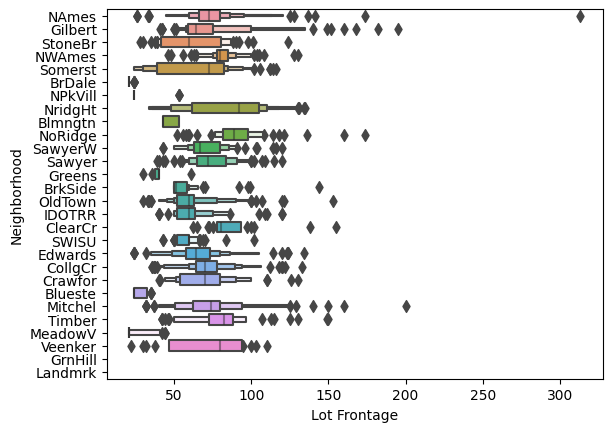

In [81]:
sns.boxenplot(x='Lot Frontage',y='Neighborhood',data=df)

In [84]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [86]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [88]:
df.to_csv('/home/kellyj/Programing/PythonProjects/temp/Ames_Housing_Data_NoOutLiers_Missing_fixed.csv')